In [131]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
import torchvision.datasets
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import os
from sklearn.preprocessing import Normalizer

In [132]:
# Создаем датасет из данных картинок
transform = T.Compose([
    T.Resize(32),
    T.ToTensor(),
    T.Normalize(mean=[0.41193202, 0.41111976, 0.41164723], std=[0.25553378, 0.25464985, 0.25376996])])

data_set = torchvision.datasets.ImageFolder(r'./TT_Person_dataset', transform=transform)

In [138]:
# Разделяем на трейн и тест в пропорции 0,8 и 0,2
train_size = int(0.5 * len(data_set))
test_size = len(data_set) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(data_set, [train_size, test_size])

In [139]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

In [147]:
# Инициализируем модель, используем Conv3d, Maxpool, Linear, Dropout
class Model(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.l1 = nn.Conv2d(3, 64, 3, padding=1)
        self.l2 = nn.Conv2d(64, 128, 3, padding=1)
        self.l3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.global_pool = nn.MaxPool2d(4, 4)
        self.output = nn.Linear(256, 2)
        self.dropout = nn.Dropout2d(0.5)
        
    def forward(self, x):
        for l in [self.l1, self.l2, self.l3]:
            x = l(x)
            x = torch.relu(x)
            x = self.pool(x)
        x = self.global_pool(x)
        x = x.view(x.shape[0], x.shape[1])
        x = self.dropout(x)
        x = self.output(x)
        return x

In [148]:
def accuracy(targets, logits):
    return (targets==logits).float().mean()


























  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

epoch 0, train loss 0.54, test loss 0.50, train acc 0.71, test acc 0.72


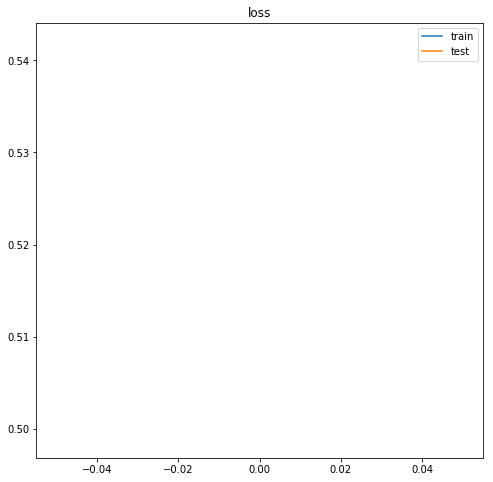

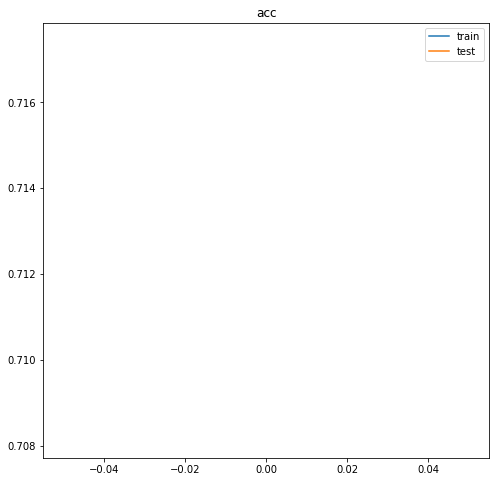


























  7%|█████▌                                                                             | 1/15 [00:10<02:21, 10.08s/it]

epoch 1, train loss 0.45, test loss 0.48, train acc 0.78, test acc 0.76


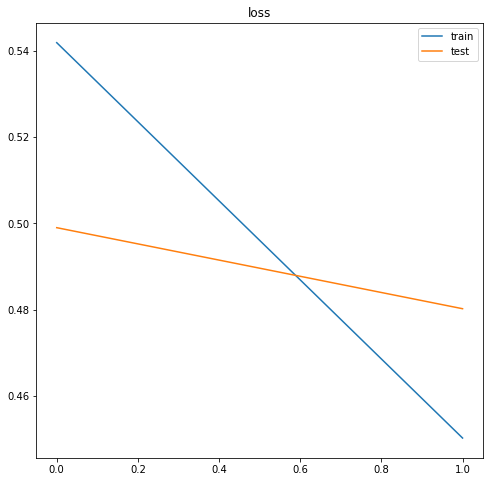

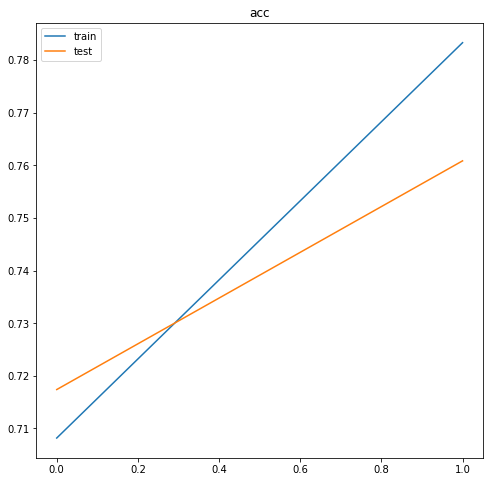


























 13%|███████████                                                                        | 2/15 [00:20<02:10, 10.05s/it]

epoch 2, train loss 0.42, test loss 0.38, train acc 0.79, test acc 0.85


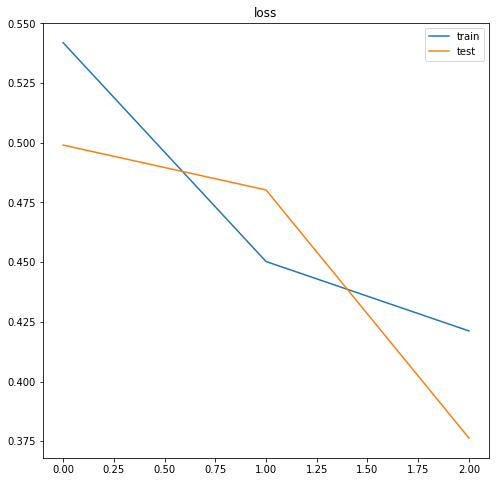

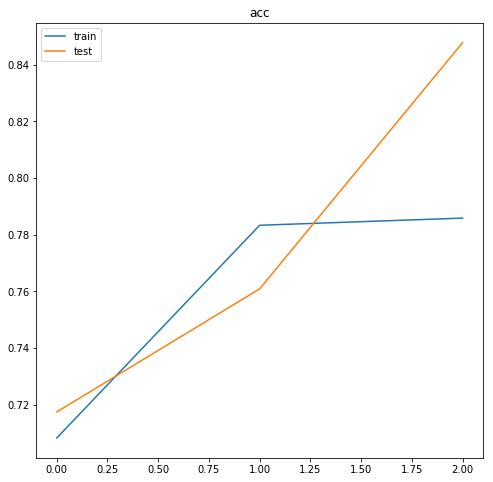


























 20%|████████████████▌                                                                  | 3/15 [00:30<02:01, 10.09s/it]

epoch 3, train loss 0.38, test loss 0.32, train acc 0.82, test acc 0.86


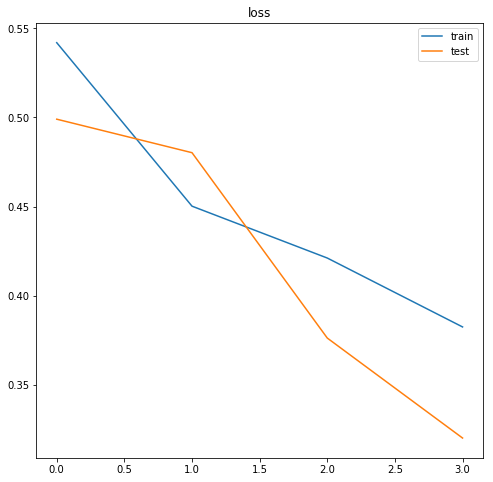

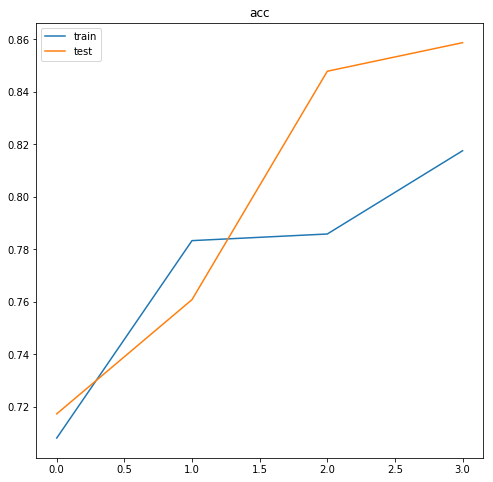


























 27%|██████████████████████▏                                                            | 4/15 [00:40<01:51, 10.14s/it]

epoch 4, train loss 0.34, test loss 0.29, train acc 0.85, test acc 0.89


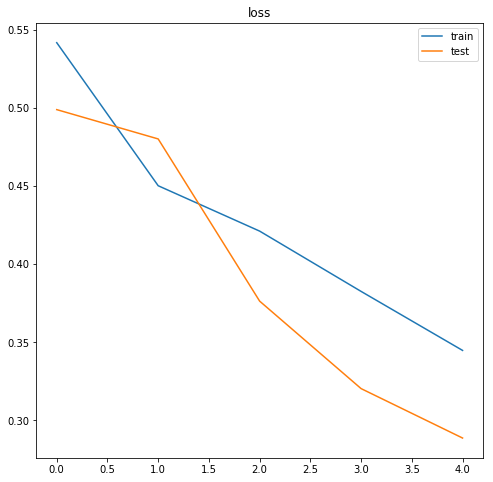

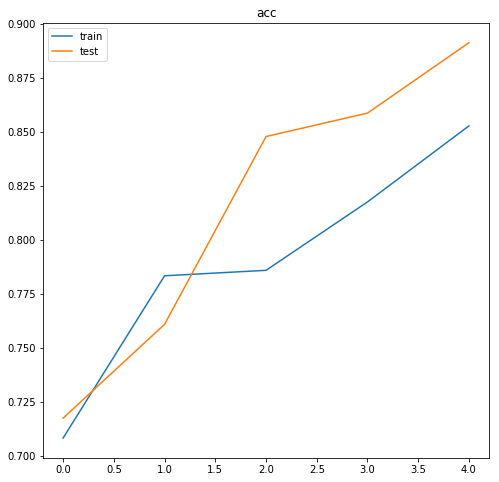


























 33%|███████████████████████████▋                                                       | 5/15 [00:50<01:41, 10.17s/it]

epoch 5, train loss 0.34, test loss 0.31, train acc 0.85, test acc 0.87


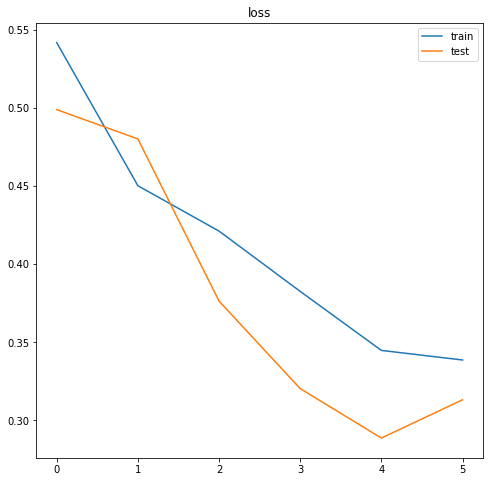

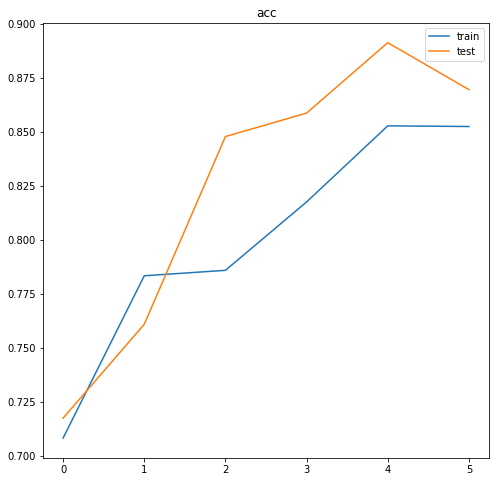


























 40%|█████████████████████████████████▏                                                 | 6/15 [01:00<01:31, 10.16s/it]

epoch 6, train loss 0.32, test loss 0.31, train acc 0.86, test acc 0.86


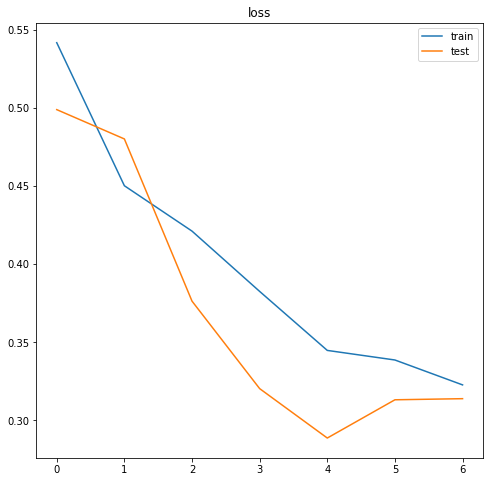

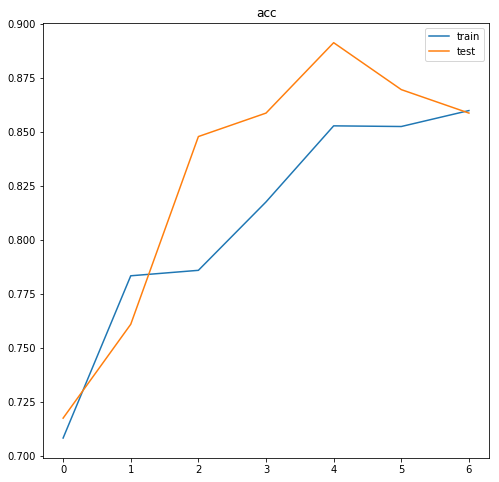


























 47%|██████████████████████████████████████▋                                            | 7/15 [01:10<01:21, 10.14s/it]

epoch 7, train loss 0.29, test loss 0.27, train acc 0.87, test acc 0.89


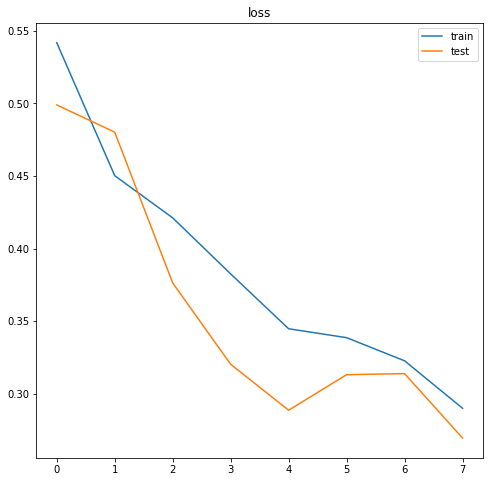

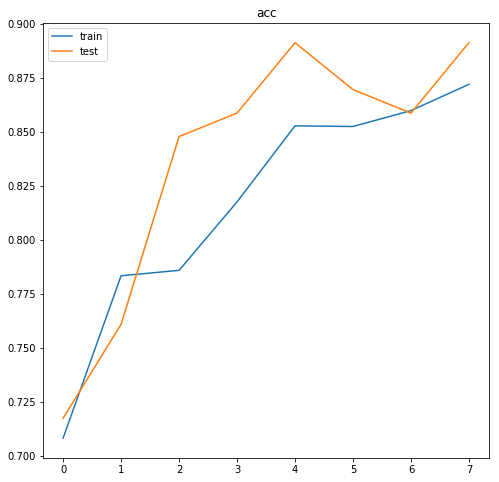


























 53%|████████████████████████████████████████████▎                                      | 8/15 [01:21<01:11, 10.22s/it]

epoch 8, train loss 0.25, test loss 0.30, train acc 0.89, test acc 0.91


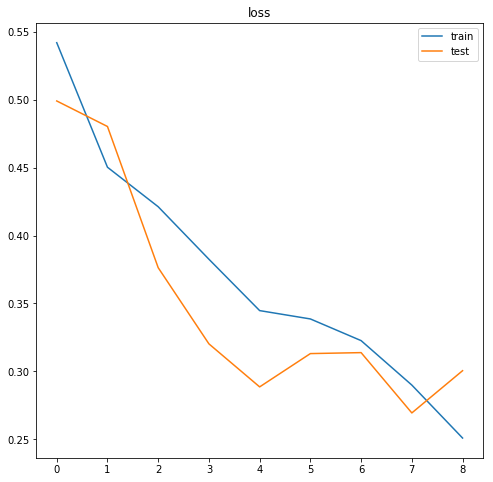

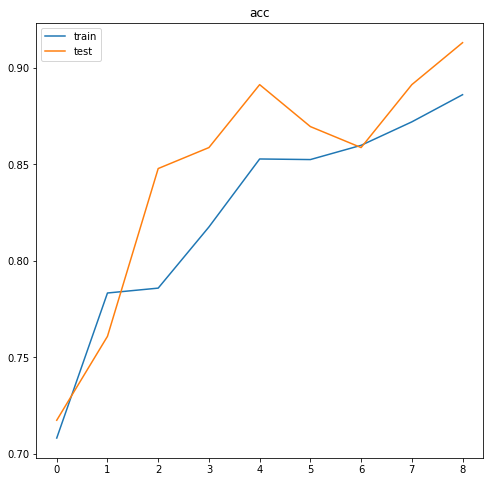


























 60%|█████████████████████████████████████████████████▊                                 | 9/15 [01:31<01:01, 10.17s/it]

epoch 9, train loss 0.24, test loss 0.31, train acc 0.90, test acc 0.88


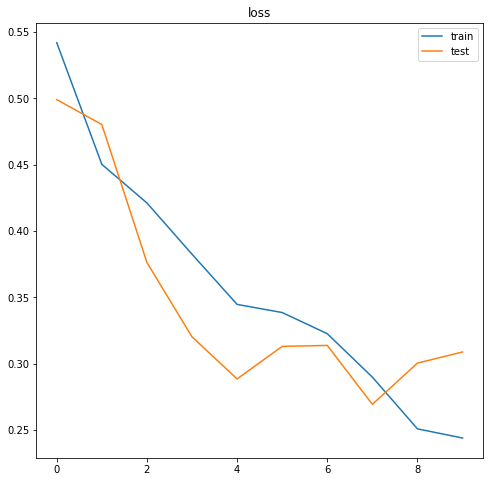

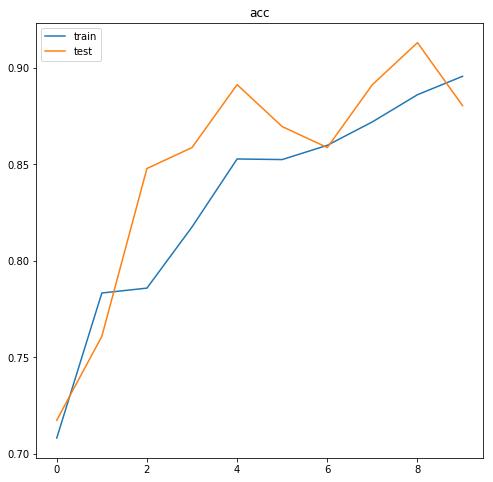


























 67%|██████████████████████████████████████████████████████▋                           | 10/15 [01:41<00:50, 10.13s/it]

epoch 10, train loss 0.23, test loss 0.27, train acc 0.90, test acc 0.88


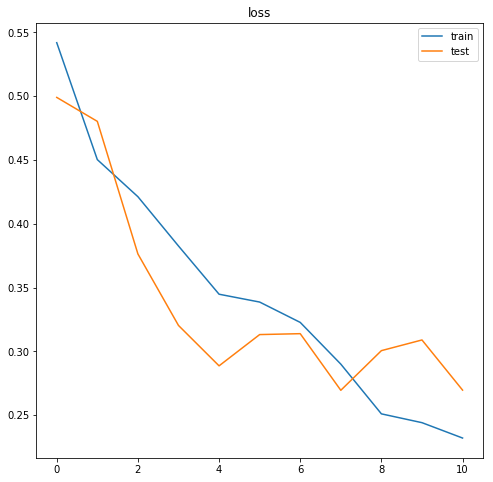

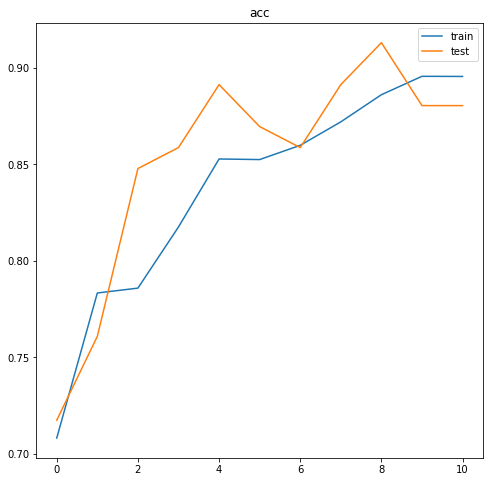


























 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [01:51<00:40, 10.13s/it]

epoch 11, train loss 0.23, test loss 0.20, train acc 0.91, test acc 0.92


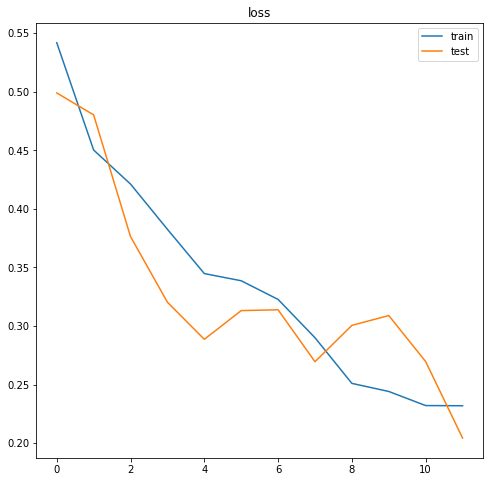

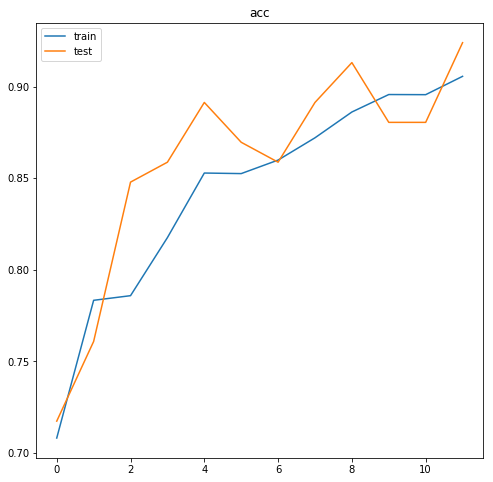


























 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [02:01<00:30, 10.08s/it]

epoch 12, train loss 0.19, test loss 0.26, train acc 0.91, test acc 0.92


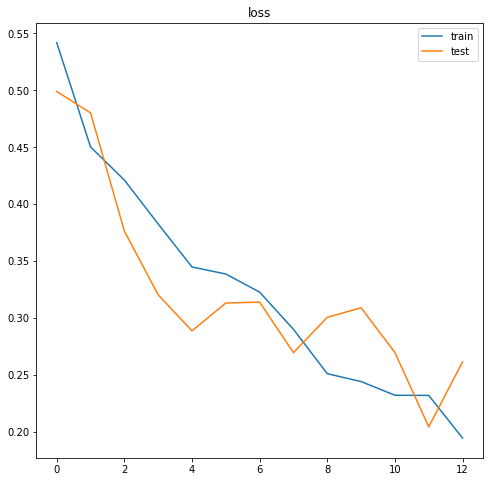

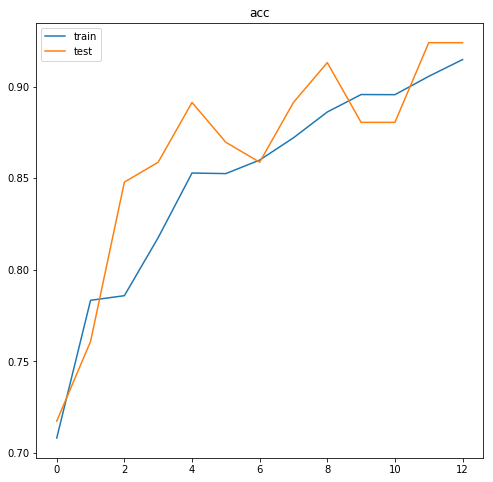


























 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [02:11<00:20, 10.06s/it]

epoch 13, train loss 0.18, test loss 0.25, train acc 0.93, test acc 0.90


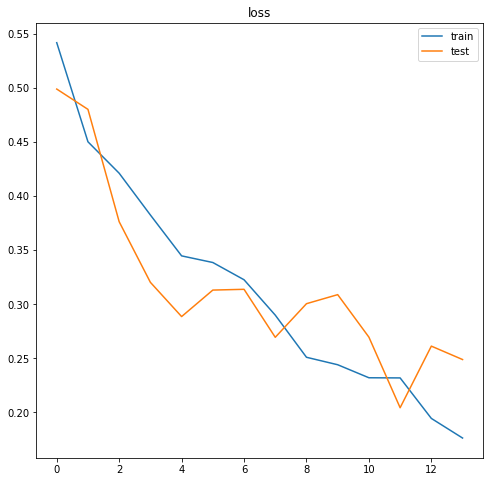

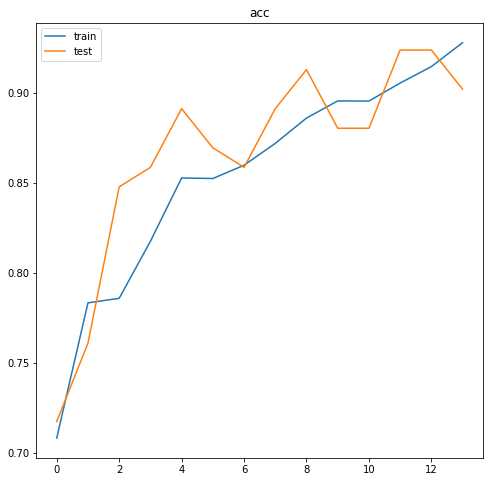


























 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [02:21<00:10, 10.10s/it]

epoch 14, train loss 0.16, test loss 0.20, train acc 0.94, test acc 0.89


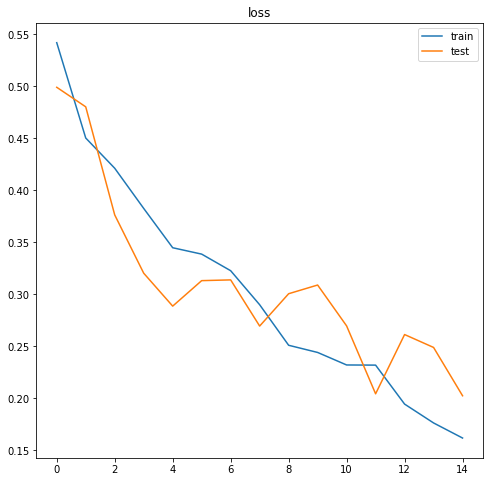

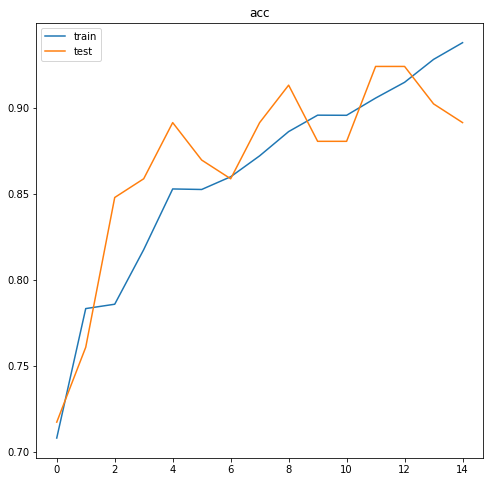


























100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:31<00:00, 10.09s/it]

In [152]:
# Реализация модели с тестовым датасетом

model = Model()
opt = torch.optim.Adam(model.parameters(), 1e-3)

stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
for epoch in tqdm(range(15)):
    train_accs = []
    train_losses = []
    for train_images, train_targets in train_loader:
        train_logits = model(train_images)
        train_loss = F.cross_entropy(input=train_logits, target=train_targets)
        train_acc = accuracy(train_targets, train_logits.argmax(1))         

        opt.zero_grad()
        train_loss.backward()
        opt.step()
        
        train_losses.append(train_loss.data.numpy())
        train_accs.append(train_acc.data.numpy())
        
    for test_images, test_targets in test_loader:
        test_accs = []
        test_losses = []
        test_logits = model(test_images)
        test_loss = F.cross_entropy(input=test_logits, target=test_targets)
        test_acc = accuracy(test_targets, test_logits.argmax(1))
                
        test_losses.append(test_loss.data.numpy())
        test_accs.append(test_acc.data.numpy())        

        
    train_loss = np.mean(train_losses)
    train_acc = np.mean(train_accs)
    test_loss = np.mean(test_losses)
    test_acc = np.mean(test_accs)   
    
    print('epoch {}, train loss {:.2f}, test loss {:.2f}, train acc {:.2f}, test acc {:.2f}'.format(
        epoch, train_loss, test_loss, train_acc, test_acc))
    
    stats['train_loss'].append(train_loss)
    stats['train_acc'].append(train_acc)
    stats['test_loss'].append(test_loss)
    stats['test_acc'].append(test_acc)

    plt.plot(stats['train_loss'], label='train')
    plt.plot(stats['test_loss'], label='test')
    plt.title('loss')
    plt.legend()
    plt.show()

    
    plt.plot(stats['train_acc'], label='train')
    plt.plot(stats['test_acc'], label='test')
    plt.title('acc')
    plt.legend()
    plt.show()